In [2]:
import tensorflow as tf
import cv2

import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("train/0/Training_3908.jpg")

In [4]:
img_array.shape

(48, 48, 3)

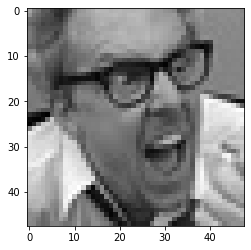

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "train/" ##Training dataset

In [7]:
Classes = ["0","3","5"] ## List of classes => exact name of the folders

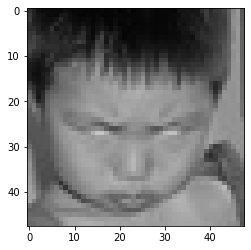

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [9]:
img_size = 224 #ImageNet => 224 X 224
new_array = cv2.resize(img_array, (img_size, img_size))
new_array.shape

(224, 224, 3)

## Read all the images and convert them into array

In [10]:
training_Data = [] ##data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1 ## Label
        for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img))
                    new_array = cv2.resize(img_array, (img_size, img_size))
                    training_Data.append([new_array, class_num])
                except Exception as e:
                        pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

16040


In [13]:
import random

random.shuffle(training_Data) ##Shuffle so architecture doesn't learn the sequence

In [14]:
x = [] ##feature/data
y = [] ##label

for features, label in training_Data:
    x.append(features) # array which contains images
    y.append(label) # array which contains labels

## Convert lists to numpy arrays
X = np.array(x, dtype=np.float32).reshape(-1, img_size, img_size, 3) ## convertering to four dimensions
Y = np.array(y)

In [15]:
X.shape ## training data, image width, image length, img channels (RGB)
Y.shape

(16040,)

In [16]:
# normalize data for learning
X /= 255.0 #max value is 255

# Deep lerning model for training - Transfer Learning

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Download model for transfer learning

In [18]:
model = tf.keras.applications.MobileNetV2() 
model.summary()

## Transfer Learning - Tuning, weights will start from last check point

In [20]:
base_input = model.layers[0].input # first layer input
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [21]:
base_output = model.layers[-2].output # second to last layer's output
base_output

#### Create new layers at the end of model

In [23]:
final_output = layers.Dense(128)(base_output) ## adding new layer after the output of global pooling layer
final_outPUt = layers.Activation('relu')(final_output) ## activation function on new layer
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(3, activation = 'softmax')(final_output) ## 3 cases: Happy, Sad, Angry - classification layer
final_output #Changed last layers of model

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output) # Create new models with new layers at the end
new_model.summary()

In [27]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) # Compile model
new_model.fit(X,Y, epochs = 25) #train model

Epoch 1/25
502/502 [==============================] - 901s 2s/step - loss: 0.6301 - accuracy: 0.7241
Epoch 2/25
502/502 [==============================] - 887s 2s/step - loss: 0.5042 - accuracy: 0.7906
Epoch 3/25
502/502 [==============================] - 1012s 2s/step - loss: 0.4519 - accuracy: 0.8096
Epoch 4/25
502/502 [==============================] - 981s 2s/step - loss: 0.4144 - accuracy: 0.8289
Epoch 5/25
502/502 [==============================] - 862s 2s/step - loss: 0.3806 - accuracy: 0.8479
Epoch 6/25
502/502 [==============================] - 915s 2s/step - loss: 0.3556 - accuracy: 0.8556
Epoch 7/25
502/502 [==============================] - 855s 2s/step - loss: 0.3233 - accuracy: 0.8681
Epoch 8/25
502/502 [==============================] - 965s 2s/step - loss: 0.3010 - accuracy: 0.8792
Epoch 9/25
502/502 [==============================] - 1008s 2s/step - loss: 0.2858 - accuracy: 0.8875
Epoch 10/25
502/502 [==============================] - 862s 2s/step - loss: 0.2470 - accu

#### Save model

In [31]:
new_model.save('Final_model_3em1.h5')

#### Test loading the model

In [4]:
temp_model = tf.keras.models.load_model('Final_model_3em1.h5') # test loading the model

# Create face detection code

#### Load image

(1765, 1765, 3)


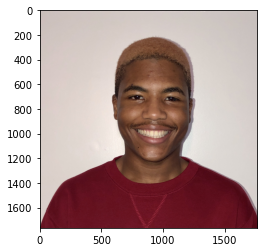

In [5]:
frame = cv2.imread("test/Student ID.jpg") 
print(frame.shape)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#### Load face detection file

In [6]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

In [7]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert image to gray scale

In [8]:
gray.shape

(1765, 1765)

### Find faces in picture

In [9]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4) 

#Add boxes around each face
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    faces2 = faceCascade.detectMultiScale(roi_gray)
    if len(faces2) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in faces2:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

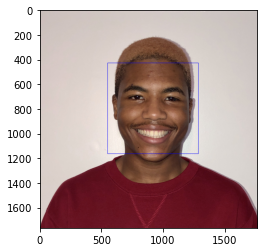

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # ROI

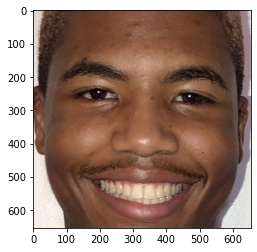

In [11]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)) #Image cropped to ROI

In [12]:
# Resize imgae
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [13]:
Predictions = temp_model.predict(final_image) #Apply model to detemine emotion

In [14]:
Predictions[0]

array([7.5667153e-09, 1.0000000e+00, 4.4155245e-11], dtype=float32)

In [15]:
Predictions.shape

(1, 3)

In [16]:
if (np.argmax(Predictions) == 0):
    print("Angry person")
elif (np.argmax(Predictions) == 1):
    print("Happy person")
elif( np.argmax(Predictions) == 2):
    print("Sad person")

Happy person
